In [2]:
from titrato.reports import SAMPL6DataProvider, SAMPL6ReportGenerator

import seaborn as sns
import logging
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
logger = logging.getLogger()
logger.setLevel(logging.INFO)
from titrato.reports import log
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines


In [5]:
epikmicro = SAMPL6DataProvider("typeI-raw-microscopic.csv", "typei", "Epik-micro", label="Epik micro", bootstrap_options={"n_samples": 1})
#epikmacro = SAMPL6DataProvider("Epik/typeIII-raw-microscopic.csv", "typeiii", "Epik-macro", label="Epik macro", bootstrap_options={"n_samples": 1}, typeiii_charge_file="Epik/typeIII-microscopic-charges.csv")
#epikstatepen = SAMPL6DataProvider("Epik/typeII-raw-microscopic.csv", "typeii", "Epik-state-penalty", label="Epik state penalty")
#epikscan = SAMPL6DataProvider("Epik/typeIII-raw-sequential.csv", "typeiii", "Epik-scan", label="Epik scan", bootstrap_options={"n_samples": 1}, typeiii_charge_file="Epik/output/sequential/charges_at_pH_7.csv")
jaguarmicro = SAMPL6DataProvider("typeI-raw-jaguar.csv", "typei", "Jaguar-micro", label="Jaguar micro", bootstrap_options={"n_samples": 1})
#jaguarmacro = SAMPL6DataProvider("Jaguar/typeIII-raw.csv", "typeiii", "Jaguar-macro", label="Jaguar macro", bootstrap_options={"n_samples": 1}, typeiii_charge_file="./Jaguar/typeIII-charges.csv")
exp = SAMPL6DataProvider("SAMPL6_experimental_pkas.csv", "exp", "Experiment", label="Experiment", bootstrap_options={"n_samples": 3})
#predictions = [epikmicro, epikmacro, epikscan, jaguarmicro, jaguarmacro, ]
predictions = [epikmicro, jaguarmicro]

In [6]:
SM14_exp = exp.load("SM14")

SM14_jag = jaguarmicro.load("SM14")

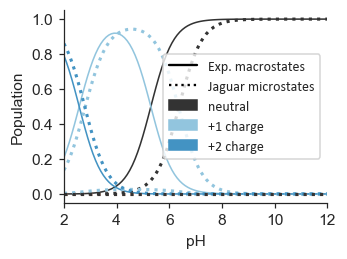

In [7]:
fig, ax = plt.subplots(
            1, 1, figsize=[3.2, 2.420], dpi=112
        )

for s, state in enumerate(SM14_exp.state_ids):
    charge = SM14_exp.charges[s]
    if s == 0:
        label = 'Experiment'
    else:
        label = ''
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM14_exp.ph_values, SM14_exp.populations[s], lw=1, color=color)

# for s, state in enumerate(SM14_epik_pka.state_ids):
#     charge = SM14_epik_pka.charges[s]
#     if s == 0:
#         label = 'Epik pKa'
#     else:
#         label = ''
#     if np.mean(SM14_epik_pka.populations[s]) < 0.01:
#         continue
#     color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
#     plt.plot(SM14_epik_pka.ph_values, SM14_epik_pka.populations[s],lw=2, ls='--', color=color)
    
for s, state in enumerate(SM14_jag.state_ids):
    charge = SM14_jag.charges[s]
    if s == 0:
        label = 'Jaguar'
    else:
        label = ''
#     if np.mean(SM14_jag.populations[s]) < 0.01:
#         continue
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM14_jag.ph_values, SM14_jag.populations[s],lw=2, ls=':', color=color)

plt.xlim([2,12])
exp_handle = mlines.Line2D([], [], color='black', linestyle='-', label='Exp. macrostates')
# epik_handle = mlines.Line2D([], [], color='black', linestyle='--', label='Epik microstates')
jag_handle = mlines.Line2D([], [], color='black', linestyle=':', label='Jaguar microstates')
plt.xlabel("pH")
plt.ylabel("Population")

plustwo =  mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][2], label='+2 charge')
plusone = mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][1], label='+1 charge')
neutral = mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][0], label='neutral')

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size(9)
fontP.set_family("Calibri")
plt.tight_layout()

ax.set_xticks(np.arange(2.0, 14.0, 2.0))
# remove top and right spines
sns.despine()
# fit everything within bounds
plt.tight_layout()
plt.savefig("fig1_population_SM14.pdf")
leg = plt.legend(handles=[exp_handle, jag_handle, neutral, plusone, plustwo],prop=fontP)
plt.savefig("fig1_population_SM14.svg")

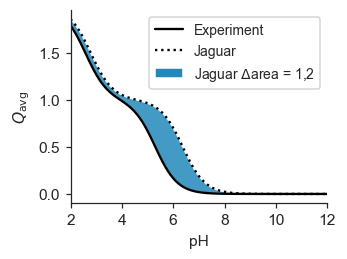

In [8]:
fig, ax = plt.subplots(
            1, 1, figsize=[3.2, 2.420], dpi=112
        )
plt.plot(SM14_exp.ph_values, SM14_exp.mean_charge, ls='-', color='black')
# plt.plot(SM14_epik_pka.ph_values, SM14_epik_pka.mean_charge, ls='--', color='black')
plt.plot(SM14_jag.ph_values, SM14_jag.mean_charge, ls=':', color='black')
# ax.fill_between(SM14_exp.ph_values, SM14_exp.mean_charge,SM14_epik_pka.mean_charge, facecolor="#FF2222",interpolate=True, alpha=0.9, hatch='||')
ax.fill_between(SM14_exp.ph_values, SM14_exp.mean_charge,SM14_jag.mean_charge, facecolor="#2288BB",interpolate=True, alpha=0.85, hatch='')
# plt.xlim([2,12])
exp_handle = mlines.Line2D([], [], color='black', linestyle='-', label='Experiment')
# epik_handle = mlines.Line2D([], [], color='black', linestyle='--', label='Epik')
jag_handle = mlines.Line2D([], [], color='black', linestyle=':', label='Jaguar')
plt.xlim([2,12])

exp_handle = mlines.Line2D([], [], color='black', linestyle='-', label='Experiment')
# epik_handle = mlines.Line2D([], [], color='black', linestyle='--', label='Epik')
jag_handle = mlines.Line2D([], [], color='black', linestyle=':', label='Jaguar')
# epikpatch = mpatches.Patch(facecolor='#FF2222', label=r'Epik     $\Delta$area = 1.0', hatch='||')
jagpatch = mpatches.Patch(facecolor='#2288BB',  label=r'Jaguar $\Delta$area = 1,2', hatch='')
fontP = FontProperties()
fontP.set_size(9)

plt.legend(handles=[exp_handle, jag_handle, jagpatch], prop=fontP)
plt.xlabel("pH")
plt.ylabel(r"$Q_\mathrm{avg}$")
ax.set_xticks(np.arange(2.0, 14.0, 2.0))
# remove top and right spines
sns.despine()
# fit everything within bounds
plt.tight_layout()
plt.savefig("fig1_charge_SM14.pdf")
plt.savefig("fig1_charge_SM14.svg")

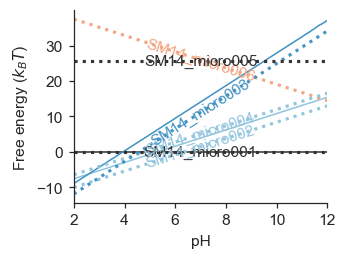

In [9]:
fig, ax = plt.subplots(
            1, 1, figsize=[3.2, 2.420], dpi=112
        )

for s, state in enumerate(SM14_exp.state_ids):
    charge = SM14_exp.charges[s]
    if s == 0:
        label = 'Experiment'
    else:
        label = ''
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM14_exp.ph_values, SM14_exp.free_energies[s], lw=1, color=color)

# for s, state in enumerate(SM14_epik_pka.state_ids):
#     charge = SM14_epik_pka.charges[s]
#     if s == 0:
#         label = 'Epik pKa'
#     else:
#         label = ''
    
#     color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
#     plt.plot(SM14_epik_pka.ph_values, SM14_epik_pka.free_energies[s],lw=2, ls='--', color=color)
    
for s, state in enumerate(SM14_jag.state_ids):
    charge = SM14_jag.charges[s]
    if s == 0:
        label = 'Jaguar'
    else:
        label = ''
    
    color= SAMPL6ReportGenerator._figprops["colors_per_charge"][charge]
    plt.plot(SM14_jag.ph_values, SM14_jag.free_energies[s],lw=2, ls=':', color=color, label=state)

plt.xlim([2,12])

exp_handle = mlines.Line2D([], [], color='black', linestyle='-', label='Exp. macrostates')
# epik_handle = mlines.Line2D([], [], color='black', linestyle='--', label='Epik microstates')
jag_handle = mlines.Line2D([], [], color='black', linestyle=':', label='Jaguar microstates')
plt.xlabel("pH")
plt.ylabel(r"Free energy ($k_B T$)")

plusone = mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][1], label='+1 charge')
neutral = mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][0], label='neutral')
plustwo =  mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][2], label='+2 charge')
minusone =  mpatches.Patch(color=SAMPL6ReportGenerator._figprops["colors_per_charge"][-1], label='-1 charge')

from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size(9)



ax.set_xticks(np.arange(2.0, 14.0, 2.0))
# remove top and right spines
sns.despine()
# fit everything within bounds
labelLines(plt.gca().get_lines(),align=True,xvals=[7,7,7,7,7,7,7,7,7,7], bbox=dict(alpha=0.0, color="w"))
plt.tight_layout()

plt.savefig("fig1_free_energy_SM14.pdf")

# leg = plt.legend(handles=[exp_handle, jag_handle, minusone, neutral, plusone, plustwo, ],prop=fontP)
plt.savefig("fig1_free_energy_SM14.svg")

In [64]:
labelLines?